In [54]:
import time
import re
start_time = time.time()

import pandas as pd

In [56]:
MMSTA_path = "../Data/MMSTA LOWDASH RHN DORA.XLSX"

In [57]:
df_mmsta = pd.read_excel(MMSTA_path)
df_mmsta

,Level,Plant,Material Type,Material,Material Description,Bill of material,Plant-sp.matl status,Plant-sp.matl status.1,BOM status,BOM status.1,...,MRP profile,MRP profile.1,Lot size,Minimum Lot Size,Rounding value,Spare part indicator,Item Category,Component unit,Component quantity,Status
0,0,MA13,YFG,F000293124,240103766V,6773261.0,2,NaN,1,0,...,A111,NaN,EX,0,0,NaN,L,NaN,0,NaN
1,*1,MA13,YSFG,S008918892,Super Group 007 See drawing,6773250.0,2,NaN,1,0,...,A210,NaN,YX,0,25,NaN,L,PC,1,NaN
2,**2,MA13,YSFG,S008918845,Double Crimping 002 See drawing,6773186.0,2,NaN,2,0,...,A210,NaN,YX,0,25,NaN,L,PC,1,NaN
3,***3,MA13,YSFG,S008918650,Circuit 0354 COFLRYB 0.75 B/BR,6772981.0,92,NaN,2,0,...,A221,NaN,YX,0,25,M,L,PC,1,NaN
4,****4,MA13,YDM,7114441702,Terminal RH Male 0.64mm Sealed,NaN,92,NaN,0,0,...,A305,NaN,ZK,0,7000,R,L,PC,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61257,**2,MA13,YDM,7196120602,Terminal 025 Female 0.64mm Unsealed,NaN,92,NaN,0,0,...,A305,NaN,ZK,0,48000,R,L,PC,1,NaN
61258,*1,MA13,YSFG,S008915591,Circuit 0575 COFLRYB 0.5 G,6769967.0,92,NaN,92,0,...,A221,NaN,YX,0,25,NaN,L,PC,1,NaN
61259,**2,MA13,YDM,7195028702,Terminal 025 Male 0.64mm Unsealed,NaN,92,NaN,0,0,...,A305,NaN,ZK,0,60000,L,L,PC,1,NaN
61260,**2,MA13,YDM,7196120602,Terminal 025 Female 0.64mm Unsealed,NaN,92,NaN,0,0,...,A305,NaN,ZK,0,48000,R,L,PC,1,NaN


In [58]:
df_mmsta.columns

Index(['Level', 'Plant', 'Material Type', 'Material', 'Material Description',
       'Bill of material', 'Plant-sp.matl status', 'Plant-sp.matl status.1',
       'BOM status', 'BOM status.1', 'Change Number', 'Changed on',
       'MRP Controller', 'MRP Controller.1', 'MRP profile', 'MRP profile.1',
       'Lot size', 'Minimum Lot Size', 'Rounding value',
       'Spare part indicator', 'Item Category', 'Component unit',
       'Component quantity', 'Status'],
      dtype='object')

In [59]:
df_mmsta = df_mmsta[['Level', 'Material Type' , 'Material', 'Material Description', 'Component quantity']]

### Add Columns 'PN','SN1','DES1', 'SN2','DES2', 'SN3','DES3'

In [60]:
def add_columns(df):
    global cols_to_add 
    cols_to_add = ['PN','SN1','DES1', 'SN2','DES2', 'SN3','DES3']
    col_index = df.columns.get_loc('Material Description') + 1
    for i, col in enumerate(cols_to_add):
        df.insert(col_index + i, col, '')
    return df
df_mmsta = add_columns(df_mmsta)
df_mmsta

,Level,Material Type,Material,Material Description,PN,SN1,DES1,SN2,DES2,SN3,DES3,Component quantity
0,0,YFG,F000293124,240103766V,,,,,,,,0
1,*1,YSFG,S008918892,Super Group 007 See drawing,,,,,,,,1
2,**2,YSFG,S008918845,Double Crimping 002 See drawing,,,,,,,,1
3,***3,YSFG,S008918650,Circuit 0354 COFLRYB 0.75 B/BR,,,,,,,,1
4,****4,YDM,7114441702,Terminal RH Male 0.64mm Sealed,,,,,,,,1
...,...,...,...,...,...,...,...,...,...,...,...,...
61257,**2,YDM,7196120602,Terminal 025 Female 0.64mm Unsealed,,,,,,,,1
61258,*1,YSFG,S008915591,Circuit 0575 COFLRYB 0.5 G,,,,,,,,1
61259,**2,YDM,7195028702,Terminal 025 Male 0.64mm Unsealed,,,,,,,,1
61260,**2,YDM,7196120602,Terminal 025 Female 0.64mm Unsealed,,,,,,,,1


### Fill PN(Part Number)

In [61]:
def Fill(level : str):
    for idx in range(df_mmsta.shape[0]):
        if df_mmsta.loc[:,'Level'][idx] == level:
            # PN_arr.append(df_mmsta.loc[idx]['Material Description'])
            df_mmsta.loc[idx,'PN'] = df_mmsta.loc[idx]['Material Description']
            idx_last_l = idx
        else :
            df_mmsta.loc[idx,'PN'] = df_mmsta.loc[idx_last_l]['Material Description']
            # PN_arr.append(df_mmsta.loc[idx_last_l]['Material Description'])
    return df_mmsta

In [62]:
df_mmsta = Fill('0')

### Delete YFG And YDM (column = 'Material Type')

In [63]:
def delete_YFG_YDM():
    return df_mmsta[~df_mmsta['Material Type'].isin(['YFG', 'YDM'])]
df_mmsta = delete_YFG_YDM()

### Processing Material Description column (del Cut Tube , Gaft...)

In [10]:
def del_vals(mat_desc : str):
    vals_to_del = ['ctgf', 'gaft', 'cut tube']
    for v in vals_to_del:
        if v in mat_desc.lower():
            return False
    return True

proccessed_log = df_mmsta['Material Description'].apply(del_vals)

df_mmsta = df_mmsta[proccessed_log].reset_index(drop=True)

In [65]:
df_mmsta = df_mmsta.reset_index()
df_mmsta

,index,Level,Material Type,Material,Material Description,PN,SN1,DES1,SN2,DES2,SN3,DES3,Component quantity
0,1,*1,YSFG,S008918892,Super Group 007 See drawing,240103766V,,,,,,,1
1,2,**2,YSFG,S008918845,Double Crimping 002 See drawing,240103766V,,,,,,,1
2,3,***3,YSFG,S008918650,Circuit 0354 COFLRYB 0.75 B/BR,240103766V,,,,,,,1
3,7,***3,YSFG,S008918649,Circuit 0253 COFLRYB 1.25 B,240103766V,,,,,,,1
4,9,***3,YSFG,S008918648,Circuit 0152 COFLRYB 0.75 B/BR,240103766V,,,,,,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18659,61241,*1,YSFG,S008918828,Circuit 0597 COFLRYB 0.35 GY/W,240105109V,,,,,,,1
18660,61246,*1,YSFG,S008918829,Circuit 0600 COFLRYB 2 B,240105109V,,,,,,,1
18661,61250,*1,YSFG,S008918831,Circuit 0726 COFLRYB 0.35 DL/W,240105109V,,,,,,,1
18662,61254,*1,YSFG,S008918832,Circuit 0727 COFLRYB 0.35 BE/W,240105109V,,,,,,,1


In [66]:
def Fill_with_col(level : str, cols,df):
    idx_last_l = None
    for idx in range(df.shape[0]):
        if df.loc[idx,'Level'] == level:
            df.loc[idx,cols[0]] = df.loc[idx,'Material']
            df.loc[idx,cols[1]] = df.loc[idx,'Material Description']
            idx_last_l = idx
           
            
        else :
            if idx_last_l is not None:
                df.loc[idx,cols[0]] = df.loc[idx_last_l,'Material']
                df.loc[idx,cols[1]] = df.loc[idx_last_l,'Material Description']
                
            else :
                df.loc[idx,cols[0]] = '(blank)'
                df.loc[idx,cols[1]] = '(blank)'
    return df

for level in df_mmsta['Level'].unique().tolist():
    sn = 'SN'+ level[-1]
    des = 'DES' + level[-1]
    df_mmsta = Fill_with_col(level, [sn, des], df_mmsta)
# df_mmsta = Fill_with_col('*1', ['SN1','DES1'], df_mmsta)

# df_mmsta = Fill_with_col('**2', ['SN2','DES2'], df_mmsta)

# df_mmsta = Fill_with_col('***3', ['SN3','DES3'], df_mmsta)

In [67]:
df_mmsta = df_mmsta[['Level' ,'PN','SN1','DES1','SN2','DES2','SN3','DES3', 'Component quantity']]

df_mmsta


,Level,PN,SN1,DES1,SN2,DES2,SN3,DES3,Component quantity
0,*1,240103766V,S008918892,Super Group 007 See drawing,(blank),(blank),(blank),(blank),1
1,**2,240103766V,S008918892,Super Group 007 See drawing,S008918845,Double Crimping 002 See drawing,(blank),(blank),1
2,***3,240103766V,S008918892,Super Group 007 See drawing,S008918845,Double Crimping 002 See drawing,S008918650,Circuit 0354 COFLRYB 0.75 B/BR,1
3,***3,240103766V,S008918892,Super Group 007 See drawing,S008918845,Double Crimping 002 See drawing,S008918649,Circuit 0253 COFLRYB 1.25 B,1
4,***3,240103766V,S008918892,Super Group 007 See drawing,S008918845,Double Crimping 002 See drawing,S008918648,Circuit 0152 COFLRYB 0.75 B/BR,1
...,...,...,...,...,...,...,...,...,...
18659,*1,240105109V,S008918828,Circuit 0597 COFLRYB 0.35 GY/W,S008918745,Circuit 0701 COFLRYB 0.35 BR/W,S008915423,Circuit 0605 COFLRYB 0.35 BR/W,1
18660,*1,240105109V,S008918829,Circuit 0600 COFLRYB 2 B,S008918745,Circuit 0701 COFLRYB 0.35 BR/W,S008915423,Circuit 0605 COFLRYB 0.35 BR/W,1
18661,*1,240105109V,S008918831,Circuit 0726 COFLRYB 0.35 DL/W,S008918745,Circuit 0701 COFLRYB 0.35 BR/W,S008915423,Circuit 0605 COFLRYB 0.35 BR/W,1
18662,*1,240105109V,S008918832,Circuit 0727 COFLRYB 0.35 BE/W,S008918745,Circuit 0701 COFLRYB 0.35 BR/W,S008915423,Circuit 0605 COFLRYB 0.35 BR/W,1


In [68]:
df_mmsta_pivot = pd.pivot_table(df_mmsta, values = 'Component quantity', index = ['Level','SN1','DES1','SN2' , 'DES2','SN3', 'DES3'], 
                                columns = 'PN', aggfunc = 'size', fill_value = ' ')
# df_mmsta_pivot = df_mmsta_pivot.reset_index()

df_mmsta_pivot

PN                                                                                                                               240100339V  \
Level SN1        DES1                        SN2        DES2                           SN3        DES3                                        
***3  S008915659 Super Group 036 See drawing S008915617 Twisted Wire 32   ZZ           S008915423 Circuit 0605 COFLRYB 0.35 BR/W          1   
                                                                                       S008915424 Circuit 0606 COFLRYB 0.35 L/W           1   
                                             S008915618 Twisted Wire 24   ZZ           S008915425 Circuit 0418 COFLRYB 0.35 BR/W          1   
                                                                                       S008915426 Circuit 0419 COFLRYB 0.35 L/W           1   
                                             S008915619 Twisted Wire 08   ZZ           S008915427 Circuit 0497 COFLRYB 0.35 BR/W          1   
...                                                                                                                                     ...   
*1    S008919077 Super Group 003 See drawing S008915702 Twisted Wire 38   ZZ           S008915671 Circuit 0610 COFLRYB 0.35 G/W               
      S008919079 Super Group 012 See drawing S008915698 Joint 0641 See drawing         S008915397 Circuit 0068 COFLRYB 0.5 B                  
                                             S008918751 Circuit 0510 COFLRYB 0.35 BR/W S008918651 Circuit 0590 COFLRYB 0.5 R                  
      S008919080 Super Group 004 See drawing S008918846 Joint 0645 See drawing         S008918651 Circuit 0590 COFLRYB 0.5 R                  
                                             S008918850 Twisted Wire 52   ZZ           S008918659 Circuit 0703 COFLRYB 0.35 G/W               

PN                                                                                                                               240100502V  \
Level SN1        DES1                        SN2        DES2                           SN3        DES3                                        
***3  S008915659 Super Group 036 See drawing S008915617 Twisted Wire 32   ZZ           S008915423 Circuit 0605 COFLRYB 0.35 BR/W              
                                                                                       S008915424 Circuit 0606 COFLRYB 0.35 L/W               
                                             S008915618 Twisted Wire 24   ZZ           S008915425 Circuit 0418 COFLRYB 0.35 BR/W              
                                                                                       S008915426 Circuit 0419 COFLRYB 0.35 L/W               
                                             S008915619 Twisted Wire 08   ZZ           S008915427 Circuit 0497 COFLRYB 0.35 BR/W              
...                                                                                                                                     ...   
*1    S008919077 Super Group 003 See drawing S008915702 Twisted Wire 38   ZZ           S008915671 Circuit 0610 COFLRYB 0.35 G/W               
      S008919079 Super Group 012 See drawing S008915698 Joint 0641 See drawing         S008915397 Circuit 0068 COFLRYB 0.5 B                  
                                             S008918751 Circuit 0510 COFLRYB 0.35 BR/W S008918651 Circuit 0590 COFLRYB 0.5 R                  
      S008919080 Super Group 004 See drawing S008918846 Joint 0645 See drawing         S008918651 Circuit 0590 COFLRYB 0.5 R                  
                                             S008918850 Twisted Wire 52   ZZ           S008918659 Circuit 0703 COFLRYB 0.35 G/W               

PN                                                                                                                               240100622V  \
Level SN1        DES1                        SN2        DES2                           SN3        DES3                                   

In [69]:
import xlwings as xw

wb = xw.Book()
sheet_mmsta = wb.sheets[0]
sheet_mmsta.name = "sep mmsta"

In [70]:
df_mmsta_pivot = df_mmsta_pivot.reset_index()

In [71]:
df_mmsta_pivot.loc[df_mmsta_pivot['Level'] == '*1', ['SN2', 'DES2', 'SN3', 'DES3']] = '(blank)'
df_mmsta_pivot.loc[df_mmsta_pivot['Level'] == '**2', ['SN3', 'DES3']] = '(blank)'
df_mmsta_pivot

PN,Level,SN1,DES1,SN2,DES2,SN3,DES3,240100339V,240100502V,240100622V,...,240107216V,240107622V,240107837V,240108098V,240108155V,240108592V,240108849V,240109138V,240109407V,240109580V
0,***3,S008915659,Super Group 036 See drawing,S008915617,Twisted Wire 32 ZZ,S008915423,Circuit 0605 COFLRYB 0.35 BR/W,1,,1,...,,1,1,,,,,1,1,
1,***3,S008915659,Super Group 036 See drawing,S008915617,Twisted Wire 32 ZZ,S008915424,Circuit 0606 COFLRYB 0.35 L/W,1,,1,...,,1,1,,,,,1,1,
2,***3,S008915659,Super Group 036 See drawing,S008915618,Twisted Wire 24 ZZ,S008915425,Circuit 0418 COFLRYB 0.35 BR/W,1,,1,...,,1,1,,,,,1,1,
3,***3,S008915659,Super Group 036 See drawing,S008915618,Twisted Wire 24 ZZ,S008915426,Circuit 0419 COFLRYB 0.35 L/W,1,,1,...,,1,1,,,,,1,1,
4,***3,S008915659,Super Group 036 See drawing,S008915619,Twisted Wire 08 ZZ,S008915427,Circuit 0497 COFLRYB 0.35 BR/W,1,,1,...,,1,1,,,,,1,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,*1,S008919077,Super Group 003 See drawing,(blank),(blank),(blank),(blank),,,,...,,,,,,,,,,
9998,*1,S008919079,Super Group 012 See drawing,(blank),(blank),(blank),(blank),,,,...,,,,,,1,,,,
9999,*1,S008919079,Super Group 012 See drawing,(blank),(blank),(blank),(blank),,,,...,,,,,,,,,,
10000,*1,S008919080,Super Group 004 See drawing,(blank),(blank),(blank),(blank),,,,...,,,,,,,,,,


In [72]:
def level_sorter(level):
    return int(level[-1])

df_mmsta_pivot['level_sort'] = df_mmsta_pivot['Level'].apply(level_sorter)
df_mmsta_pivot = df_mmsta_pivot.sort_values('level_sort').drop(columns='level_sort')

df_mmsta_pivot

PN,Level,SN1,DES1,SN2,DES2,SN3,DES3,240100339V,240100502V,240100622V,...,240107216V,240107622V,240107837V,240108098V,240108155V,240108592V,240108849V,240109138V,240109407V,240109580V
2500,*1,S004207324,Cut Tube CTGF2 B/W 4.5 @ 55,(blank),(blank),(blank),(blank),,1,,...,,,,,,,,,,
7901,*1,S008918806,Circuit 0320 COFLRYB 0.35 L/W,(blank),(blank),(blank),(blank),,,,...,,,,,,,,,,
7902,*1,S008918806,Circuit 0320 COFLRYB 0.35 L/W,(blank),(blank),(blank),(blank),,,,...,,,,,,,,,,
7903,*1,S008918806,Circuit 0320 COFLRYB 0.35 L/W,(blank),(blank),(blank),(blank),,,,...,,,,,,,,,,
7904,*1,S008918806,Circuit 0320 COFLRYB 0.35 L/W,(blank),(blank),(blank),(blank),,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,***3,S008915831,Super Group 024 See drawing,S008905173,Twisted Wire 30 ZZ,S008904985,Circuit 0614 COFLRYB 0.35 BR/W,,1,,...,,,,,,,1,,1,
14,***3,S008915831,Super Group 024 See drawing,S008915825,Twisted Wire 47 ZZ,S008915816,Circuit 0622 COFLRYB 0.35 BR/W,,1,,...,,,,,,,1,,1,
15,***3,S008915831,Super Group 024 See drawing,S008915825,Twisted Wire 47 ZZ,S008915817,Circuit 0623 COFLRYB 0.35 P/W,,1,,...,,,,,,,1,,1,
0,***3,S008915659,Super Group 036 See drawing,S008915617,Twisted Wire 32 ZZ,S008915423,Circuit 0605 COFLRYB 0.35 BR/W,1,,1,...,,1,1,,,,,1,1,


In [ ]:
# Sep_sheet = wb.sheets.add(after=sheet_mmsta)
# Sep_sheet.name = "Sep Sheet"
# Sep_sheet.range("A1").value = [df_mmsta_pivot.columns.tolist()] + df_mmsta_pivot.values.tolist()

In [73]:
df_mmsta_pivot[df_mmsta_pivot.columns[7:]] = df_mmsta_pivot[df_mmsta_pivot.columns[7:]].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

In [79]:
cols = ['Level', 'SN1', 'DES1', 'SN2', 'DES2', 'SN3', 'DES3']
cols.extend(columns_to_agg)
cols

['Level',
 'SN1',
 'DES1',
 'SN2',
 'DES2',
 'SN3',
 'DES3',
 '240100339V',
 '240100502V',
 '240100622V',
 '240100991V',
 '240101080V',
 '240101094V',
 '240101713V',
 '240102007V',
 '240102054V',
 '240102116V',
 '240102393V',
 '240102646V',
 '240102820V',
 '240103091V',
 '240103178V',
 '240103678V',
 '240103766V',
 '240104500V',
 '240104640V',
 '240105077V',
 '240105109V',
 '240105110V',
 '240105246V',
 '240106497V',
 '240106548V',
 '240107120V',
 '240107216V',
 '240107622V',
 '240107837V',
 '240108098V',
 '240108155V',
 '240108592V',
 '240108849V',
 '240109138V',
 '240109407V',
 '240109580V']

In [80]:
columns_to_agg = list(df_mmsta_pivot.columns[7:])

agg_dict = {col: 'sum' for col in columns_to_agg}

df_mmsta_pivot = df_mmsta_pivot.groupby(['Level','SN1','SN2','SN3']).agg({
    'DES1': 'first',
    'DES2': 'first',
    'DES3': 'first',
    **agg_dict
    
}).reset_index()

df_mmsta_pivot = df_mmsta_pivot[cols]
df_mmsta_pivot.replace(to_replace=" " , value="(Blank)")
df_mmsta_pivot.replace(to_replace= 0 , value=" ")


sheet_mmsta.range("A1").value = [df_mmsta_pivot.columns.tolist()] + df_mmsta_pivot.values.tolist()

In [ ]:
df_fil_simple = df_mmsta_pivot [df_mmsta_pivot['DES1'].apply(lambda x : 'circuit' in x.lower())]
columns_to_agg = list(df_fil_simple.columns[7:])

agg_dict = {col: 'sum' for col in columns_to_agg}

df_fil_simple = df_fil_simple.groupby(['Level','SN1']).agg({
    'DES1': 'first',
    'SN2': 'first',
    'DES2': 'first',
    'SN3': 'first',
    'DES3': 'first',
    **agg_dict
    
}).reset_index()

df_fil_simple.replace(to_replace=" " , value="(Blank)")
df_fil_simple.replace(to_replace= 0 , value=" ")

double_sheet = wb.sheets.add(after=sheet_mmsta)
sheet_mmsta.name = "Fil Simple"
sheet_mmsta.range("A1").value = [df_fil_simple.columns.tolist()] + df_fil_simple.values.tolist()

In [49]:
df_double = df_mmsta_pivot [df_mmsta_pivot['DES1'].apply(lambda x : 'double' in x.lower())]
df_double = df_double.groupby(['Level','SN1']).agg({
    'DES1': 'first',
    'SN2': 'first',
    'DES2': 'first',
    'SN3': 'first',
    'DES3': 'first',
    **agg_dict
    
}).reset_index()

double_sheet = wb.sheets.add(after=sheet_mmsta)
double_sheet.name = "Double"
double_sheet.range("A1").value = [df_double.columns.tolist()] + df_double.values.tolist()

In [50]:
df_twisted = df_mmsta_pivot [df_mmsta_pivot['DES1'].apply(lambda x : 'twisted' in x.lower())]
df_twisted = df_twisted.groupby(['Level','SN1','SN2','SN3']).agg({
    'DES1': 'first',
    'DES2': 'first',
    'DES3': 'first',
    **agg_dict
    
}).reset_index()
twisted_sheet = wb.sheets.add(after=double_sheet)
twisted_sheet.name = "Twisted"
twisted_sheet.range("A1").value = [df_twisted.columns.tolist()] + df_twisted.values.tolist()

In [51]:
df_joint = df_mmsta_pivot [df_mmsta_pivot['DES1'].apply(lambda x : 'joint' in x.lower())]
df_joint = df_joint.groupby(['Level','SN1','SN2','SN3']).agg({
    'DES1': 'first',
    'DES2': 'first',
    'DES3': 'first',
    **agg_dict
    
}).reset_index()
joint_sheet = wb.sheets.add(after=twisted_sheet)
joint_sheet.name = "joint"
joint_sheet.range("A1").value = [df_joint.columns.tolist()] + df_joint.values.tolist()

In [52]:
df_super_grp = df_mmsta_pivot [df_mmsta_pivot['DES1'].apply(lambda x : 'super group' in x.lower())]
df_super_grp = df_super_grp.groupby(['Level','SN1','SN2','SN3']).agg({
    'DES1': 'first',
    'DES2': 'first',
    'DES3': 'first',
    **agg_dict
    
}).reset_index()
superGrp_sheet = wb.sheets.add(after=joint_sheet)
superGrp_sheet.name = "Super group"
superGrp_sheet.range("A1").value = [df_super_grp.columns.tolist()] + df_super_grp.values.tolist()

In [53]:
end_time = time.time()

execution_time = end_time - start_time
print(f"Temps d'exécution : {execution_time / 60} minutes")

Temps d'exécution : 16.861653383572897 minutes


Comparaison 

In [31]:
def compare_cable_types(df_mmsta):
    def is_fil_simple(row):
        return 'circuit' in str(row['DES1']).lower() and not 'double' in str(row['DES1']).lower()
    
    def is_double(row):
        return 'double' in str(row['DES1']).lower()
    
    def is_twisted(row):
        return 'twisted' in str(row['DES1']).lower() or 'twisted' in str(row['DES2']).lower()
    
    def is_squib(row):
        return 'squib' in str(row['DES1']).lower() or 'squib' in str(row['DES2']).lower()
    
    def is_gw(row):
        return 'gw' in str(row['DES1']).lower() or 'gw' in str(row['DES2']).lower()
    
    def is_joint(row):
        return 'joint' in str(row['DES1']).lower() or 'joint' in str(row['DES2']).lower()
    
    def is_sg(row):
        return 'super group' in str(row['DES1']).lower() or 'super grp' in str(row['DES1']).lower()

   Cable Type  Count  Percentage
0  FIL SIMPLE   8167       25.87
1      DOUBLE   2208        6.99
2     TWISTED  10105       32.00
3       SQUIB      0        0.00
4          GW      0        0.00
5       JOINT   7751       24.55
6          SG   8345       26.43
7       TOTAL  31575      100.00


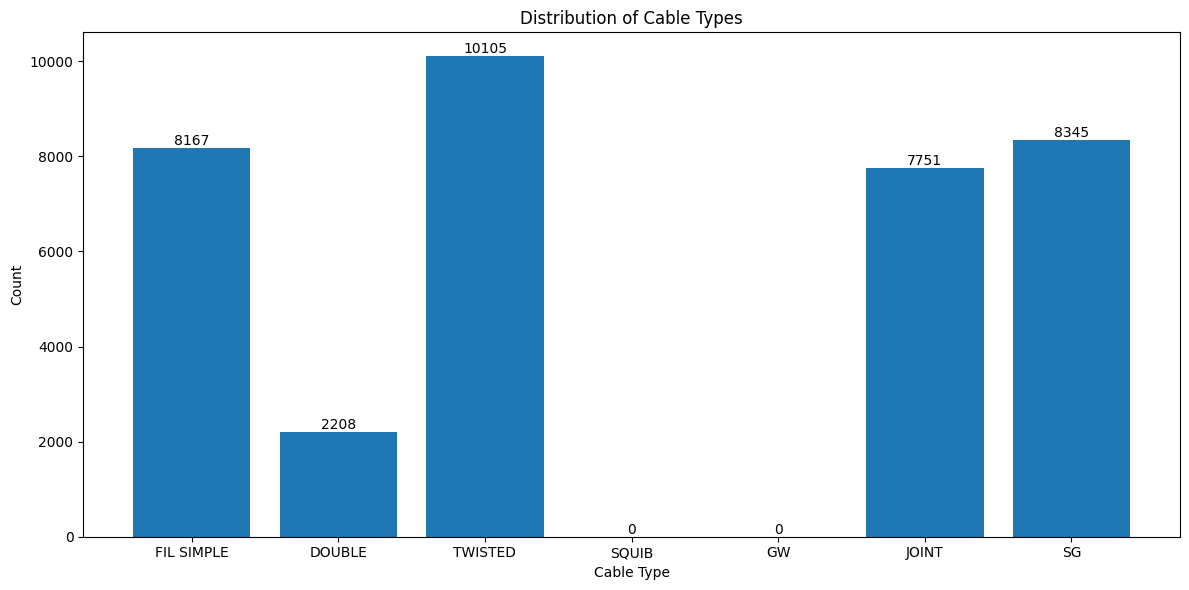

In [32]:
def compare_cable_types(df):
    def is_fil_simple(row):
        return 'circuit' in str(row['DES1']).lower() and not 'double' in str(row['DES1']).lower()
    
    def is_double(row):
        return 'double' in str(row['DES1']).lower()
    
    def is_twisted(row):
        return 'twisted' in str(row['DES1']).lower() or 'twisted' in str(row['DES2']).lower()
    
    def is_squib(row):
        return 'squib' in str(row['DES1']).lower() or 'squib' in str(row['DES2']).lower()
    
    def is_gw(row):
        return 'gw' in str(row['DES1']).lower() or 'gw' in str(row['DES2']).lower()
    
    def is_joint(row):
        return 'joint' in str(row['DES1']).lower() or 'joint' in str(row['DES2']).lower()
    
    def is_sg(row):
        return 'super group' in str(row['DES1']).lower() or 'super grp' in str(row['DES1']).lower()
    
    # Count each type
    counts = {
        'FIL SIMPLE': df.apply(is_fil_simple, axis=1).sum(),
        'DOUBLE': df.apply(is_double, axis=1).sum(),
        'TWISTED': df.apply(is_twisted, axis=1).sum(),
        'SQUIB': df.apply(is_squib, axis=1).sum(),
        'GW': df.apply(is_gw, axis=1).sum(),
        'JOINT': df.apply(is_joint, axis=1).sum(),
        'SG': df.apply(is_sg, axis=1).sum(),
    }
    counts['TOTAL'] = len(df)
    
    df_counts = pd.DataFrame(list(counts.items()), columns=['Cable Type', 'Count'])
    
    df_counts['Percentage'] = (df_counts['Count'] / counts['TOTAL'] * 100).round(2)
    
    # Create a bar chart
    plt.figure(figsize=(12, 6))
    bars = plt.bar(df_counts['Cable Type'][:-1], df_counts['Count'][:-1])
    plt.title('Distribution of Cable Types')
    plt.xlabel('Cable Type')
    plt.ylabel('Count')
    
    # Add count labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                 f'{height}', ha='center', va='bottom')
    
    plt.tight_layout()
    
    return df_counts

import matplotlib.pyplot as plt

cable_comparison = compare_cable_types(df_mmsta)
print(cable_comparison)

In [33]:
path_max_wire = "../Data/Raw/liste_circuit_integre.xlsx"
df_max_wire_list = pd.read_excel(path_max_wire)
df_max_wire_list

,Customer Module/Option,Customer Module/Option Function,Wire Type,Wire Customer Name,Wire Internal Name,TYPE,SN ADD,SN P2,Super group,Initial Wire Length[Twisted],...,240109008V:00001,240109070V:A0000,240109175V:A0000,240109282V:A0000,240109301V:A0000,240109523V:A0000,240109667V:A0000,240109876V:A0000,240109949V:00001,salma
0,HTS02||FSE07,NaN,Single Wire,1,1,SG,S008904818,S008905161,S008905216,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Circuit 0001 COFLRYB 1.5 B/BR
1,HTS02||FSE07,NaN,Single Wire,1,1,SG,S008904818,S008905240,S008905244,NaN,...,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,Circuit 0001 COFLRYB 1.5 B/BR
2,HTS02||FSE07,NaN,Single Wire,1,1,SG,S008904818,S008905161,S008905288,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Circuit 0001 COFLRYB 1.5 B/BR
3,HTS02||FSE07,NaN,Single Wire,1,1,SG,S008904818,S008905349,S008905365,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,X,NaN,Circuit 0001 COFLRYB 1.5 B/BR
4,HTS02||FSE07,NaN,Single Wire,1,1,SG,S008904818,S008905349,S008905389,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,Circuit 0001 COFLRYB 1.5 B/BR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,!AVCAM,NaN,Twisted Wire,89,672,Twist,S008548654,S008548941,NaN,910.0,...,X,X,X,X,X,X,X,X,X,Circuit 0672 COFLRYB 0.35 BR/W
1193,ALL,NaN,Single Wire,9,9,FIL SIMPLE,S008548718,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,Circuit 0009 COFLRYB 0.35 G/W
1194,ALL,NaN,Single Wire,91,575,FIL SIMPLE,S008905117,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,Circuit 0575 COFLRYB 0.5 GY
1195,ALL,NaN,Single Wire,92,542,FIL SIMPLE,S008905116,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,Circuit 0542 COFLRYB 0.5 P


In [34]:
df_max_wire_list['TYPE'].unique()

array(['SG', nan, 'FIL SIMPLE', 'Joint', 'Double', 'SQUIB', 'Twist', 'GW'],
      dtype=object)

   Cable Type  Count  Percentage
0          SG    619       51.76
1  FIL SIMPLE    248       20.74
2       Joint    152       12.71
3       Twist    118        9.87
4      Double     40        3.34
5          GW     12        1.00
6       SQUIB      7        0.59


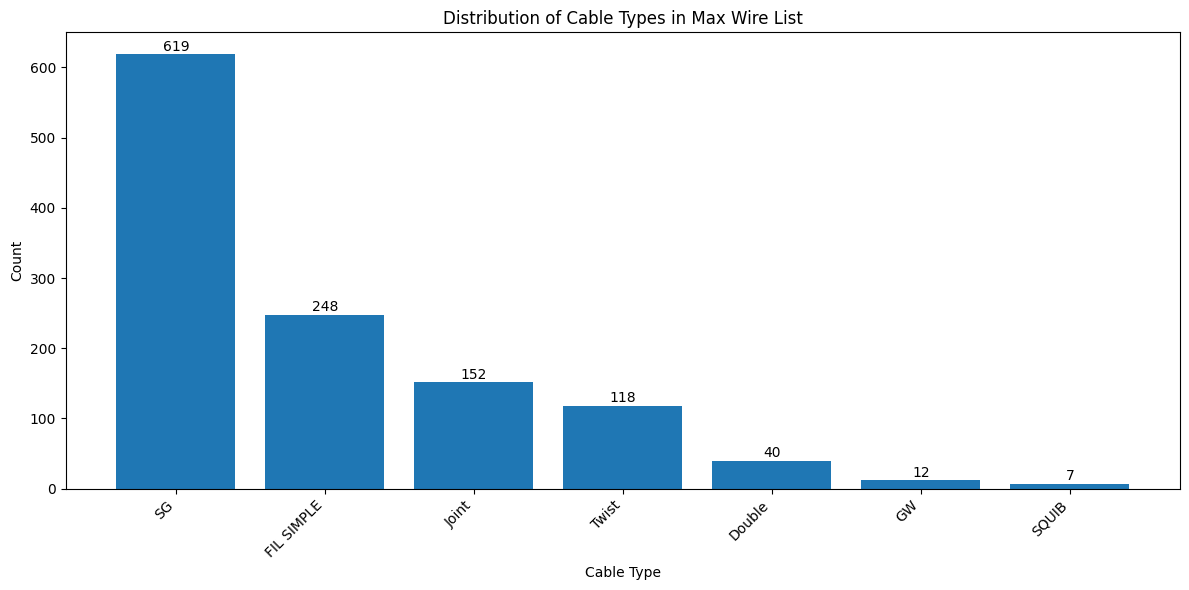

In [35]:
import matplotlib.pyplot as plt

# Count cable types
type_counts = df_max_wire_list['TYPE'].value_counts().reset_index()
type_counts.columns = ['Cable Type', 'Count']
type_counts['Percentage'] = (type_counts['Count'] / type_counts['Count'].sum() * 100).round(2)

# Create a bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(type_counts['Cable Type'], type_counts['Count'])
plt.title('Distribution of Cable Types in Max Wire List')
plt.xlabel('Cable Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height}', ha='center', va='bottom')

plt.tight_layout()

# Display the dataframe with counts and percentages
print(type_counts)

In [36]:
def compare_cable_distributions():
    max_wire_types = dict(zip(type_counts['Cable Type'], type_counts['Count']))
    mmsta_types = dict(zip(cable_comparison['Cable Type'], cable_comparison['Count']))
    
    all_types = set(max_wire_types.keys()) | set(mmsta_types.keys())
    if 'TOTAL' in all_types:
        all_types.remove('TOTAL')
    
    comparison_data = []
    for cable_type in all_types:
        max_wire_count = max_wire_types.get(cable_type, 0)
        mmsta_count = mmsta_types.get(cable_type, 0)
        percentage_diff = 0
        
        if max_wire_count > 0:
            percentage_diff = ((mmsta_count - max_wire_count) / max_wire_count) * 100
        
        comparison_data.append({
            'Cable Type': cable_type,
            'Max Wire Count': max_wire_count,
            'MMSTA Count': mmsta_count,
            'Difference': mmsta_count - max_wire_count,
            'Percentage Diff': round(percentage_diff, 2)
        })
    
    comparison_df = pd.DataFrame(comparison_data)
    comparison_df = comparison_df.sort_values('Max Wire Count', ascending=False).reset_index(drop=True)
    
    return comparison_df

cable_distribution_comparison = compare_cable_distributions()
display(cable_distribution_comparison)

plt.figure(figsize=(14, 8))
cable_types = cable_distribution_comparison['Cable Type']
x = np.arange(len(cable_types))
width = 0.35

plt.bar(x - width/2, cable_distribution_comparison['Max Wire Count'], width, label='Max Wire List')
plt.bar(x + width/2, cable_distribution_comparison['MMSTA Count'], width, label='MMSTA')

plt.xlabel('Cable Type')
plt.ylabel('Count')
plt.title('Cable Type Distribution Comparison')
plt.xticks(x, cable_types)
plt.legend()

for i, v in enumerate(cable_distribution_comparison['Max Wire Count']):
    plt.text(i - width/2, v + 5, str(v), ha='center')

for i, v in enumerate(cable_distribution_comparison['MMSTA Count']):
    plt.text(i + width/2, v + 5, str(v), ha='center')

plt.tight_layout()
plt.show()

,Cable Type,Max Wire Count,MMSTA Count,Difference,Percentage Diff
0,SG,619,8345,7726,1248.14
1,FIL SIMPLE,248,8167,7919,3193.15
2,Joint,152,0,-152,-100.00
3,Twist,118,0,-118,-100.00
4,Double,40,0,-40,-100.00
5,GW,12,0,-12,-100.00
6,SQUIB,7,0,-7,-100.00
7,TWISTED,0,10105,10105,0.00
8,DOUBLE,0,2208,2208,0.00
9,JOINT,0,7751,7751,0.00


NameError: name 'np' is not defined

<Figure size 1400x800 with 0 Axes>